In [224]:
import cv2
import matplotlib.pyplot as plt
import numpy as np    

In [225]:
def detect_Low_contrast_image(image_path, contrast_threshold=10):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found or unable to load.")

    # Calculate the standard deviation of pixel intensities
    std_dev = np.std(image)

    #value of std
    print(std_dev)

    # Check if standard deviation is below the threshold
    if std_dev < contrast_threshold:
        return True  
    else:
        return False  

# Test the function
image_path = "test cases/10 - wen el kontraastttt.jpg"
if detect_Low_contrast_image(image_path):
    print("The image is low contrast.")
else:
    print("The image has sufficient contrast.")


1.7948836100833006
The image is low contrast.


Solution 1 Not working

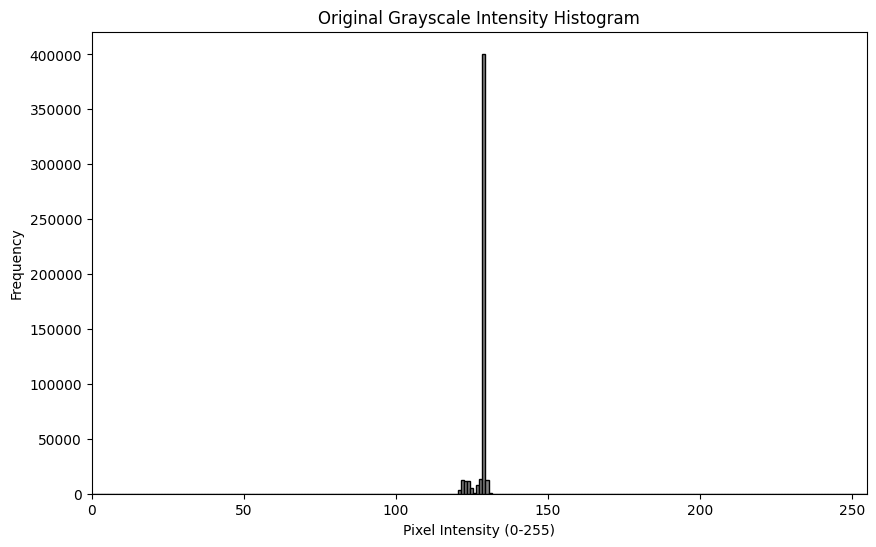

The intensity with the most number of pixels is: 129


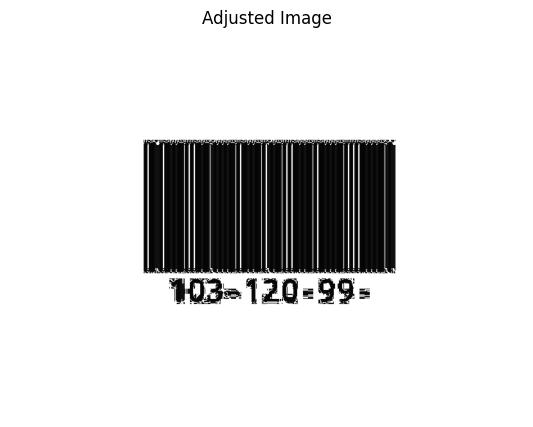

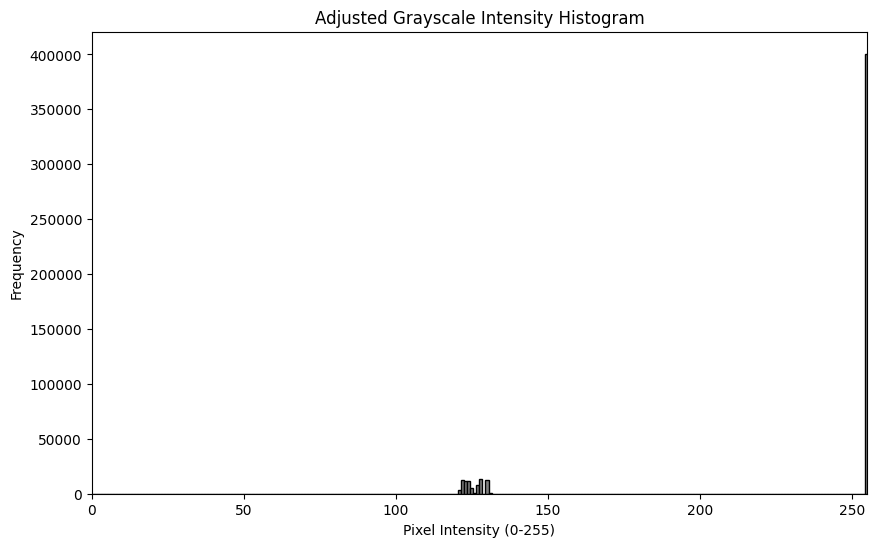

In [226]:
def plot_and_adjust_intensity(image_path):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise ValueError("Image not found or unable to load.")

    # Calculate the histogram
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 256))

    # Plot the original histogram
    plt.figure(figsize=(10, 6))
    plt.title("Original Grayscale Intensity Histogram")
    plt.xlabel("Pixel Intensity (0-255)")
    plt.ylabel("Frequency")
    plt.bar(bin_edges[:-1], histogram, width=1, color="gray", edgecolor="black")
    plt.xlim([0, 255])
    plt.show()

    # Find the intensity with the most number of pixels
    most_common_intensity = np.argmax(histogram)
    print(f"The intensity with the most number of pixels is: {most_common_intensity}")

    # Adjust the most common intensity to 255
    adjusted_image = np.where(image == most_common_intensity, 255, image)

    # Save and display the adjusted image
    plt.figure(figsize=(10, 5))
    plt.title("Adjusted Image")
    plt.imshow(adjusted_image, cmap='gray')
    plt.axis('off')
    plt.show()

    # Save the adjusted image if needed
    cv2.imwrite("adjusted_image.png", adjusted_image.astype(np.uint8))

    # Plot the histogram of the adjusted image
    new_histogram, new_bin_edges = np.histogram(adjusted_image, bins=256, range=(0, 256))
    plt.figure(figsize=(10, 6))
    plt.title("Adjusted Grayscale Intensity Histogram")
    plt.xlabel("Pixel Intensity (0-255)")
    plt.ylabel("Frequency")
    plt.bar(new_bin_edges[:-1], new_histogram, width=1, color="gray", edgecolor="black")
    plt.xlim([0, 255])
    plt.show()

# Example usage
plot_and_adjust_intensity("test cases/10 - wen el kontraastttt.jpg")

    
    


Solution 2

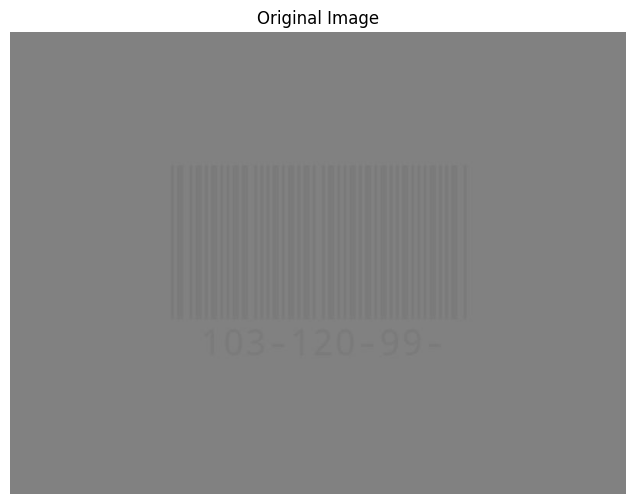

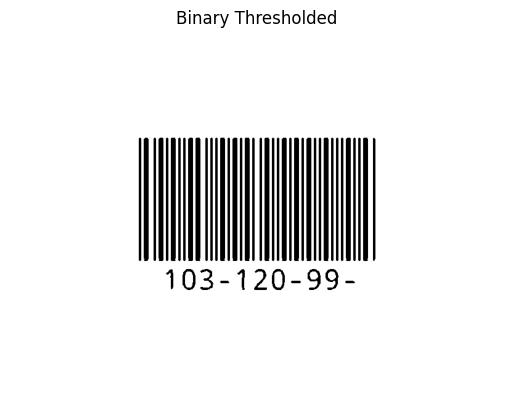

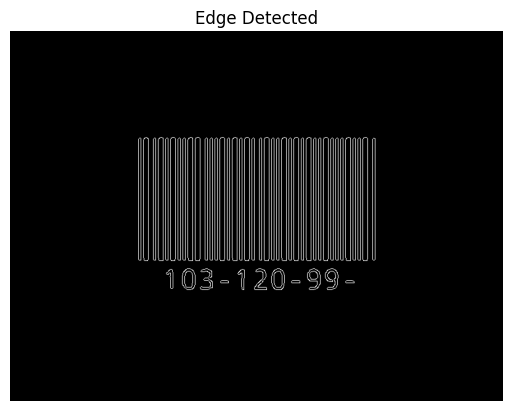

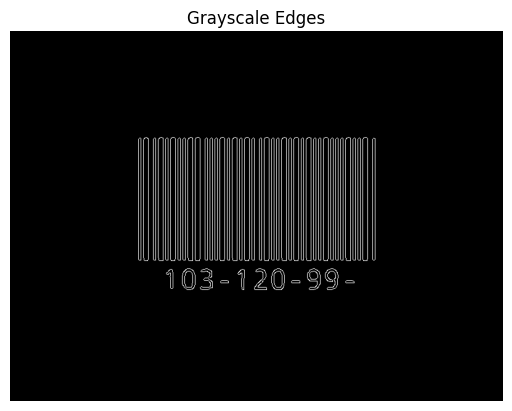

In [227]:
image_ = "test cases/10 - wen el kontraastttt.jpg"
image_ = cv2.imread(image_)

plt.figure(figsize=(10, 6))
plt.title("Original Image")
plt.imshow(image_)
plt.axis('off')  
plt.show()


image = cv2.imread("test cases/10 - wen el kontraastttt.jpg", cv2.IMREAD_GRAYSCALE)

blurred_image = cv2.medianBlur(image, 3)

# Apply Binary Thresholding
_, binary_image = cv2.threshold(blurred_image, 125, 255, cv2.THRESH_BINARY)

# Perform Morphological Closing to fill gaps
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morphed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Apply Canny Edge Detection
edges = cv2.Canny(morphed_image, 50, 150)

grayscale_edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX)


plt.title("Binary Thresholded")
plt.imshow(binary_image, cmap="gray")
plt.axis("off")
plt.show()

plt.title("Edge Detected")
plt.imshow(edges, cmap="gray")
plt.axis("off")

plt.show()

plt.title("Grayscale Edges")
plt.imshow(grayscale_edges, cmap="gray")
plt.axis("off")

plt.show()